# Magnetic model validations

This notebook compares the model values calculated by the staging (eoxmagmod v0.12.0) and production (eoxmagmod v0.10.0) instances.

Note: staging is compiled with a different compiler and arch specific optimizations.

In [1]:
from viresclient._wps.time_util import parse_datetime, parse_duration
from validation import get_random_time, get_random_collection, get_compared_model_values

COLLECTIONS = ["SW_OPER_MAGA_LR_1B", "SW_OPER_MAGB_LR_1B", "SW_OPER_MAGC_LR_1B"]

#TESTED_SERVER_URL = "https://staging.viresdisc.vires.services"
TESTED_SERVER_URL = "https://staging.vires.services"
REFERENCE_SERVER_URL = "https://vires.services"

#TESTED_SERVER_URL = "https://staging.vires.services"
#REFERENCE_SERVER_URL = "https://staging.vires.services"
#REFERENCE_SERVER_URL = "https://staging.viresdisc.vires.services"

collection = get_random_collection(COLLECTIONS)

collection_start = parse_datetime("2014-01-01")
collection_end = parse_datetime("2019-12-31")

start = get_random_time(collection_start, collection_end)
end = start + parse_duration("P365D")

models = [
    "CHAOS-Core",
    "CHAOS-Static",
    "CHAOS-MMA-Primary",
    "CHAOS-MMA-Secondary",
    "MIO_SHA_2C-Primary",
    "MIO_SHA_2C-Secondary",
]
auxiliaries = ["F107", "SunLongitude", "SunDeclination", "SunHourAngle", "Longitude"]
data = get_compared_model_values(TESTED_SERVER_URL, REFERENCE_SERVER_URL, collection, start, end, models=models, auxiliaries=auxiliaries)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (122.686MB)

https://vires.services 1067.27s


Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (122.686MB)

https://staging.vires.services 485.629s


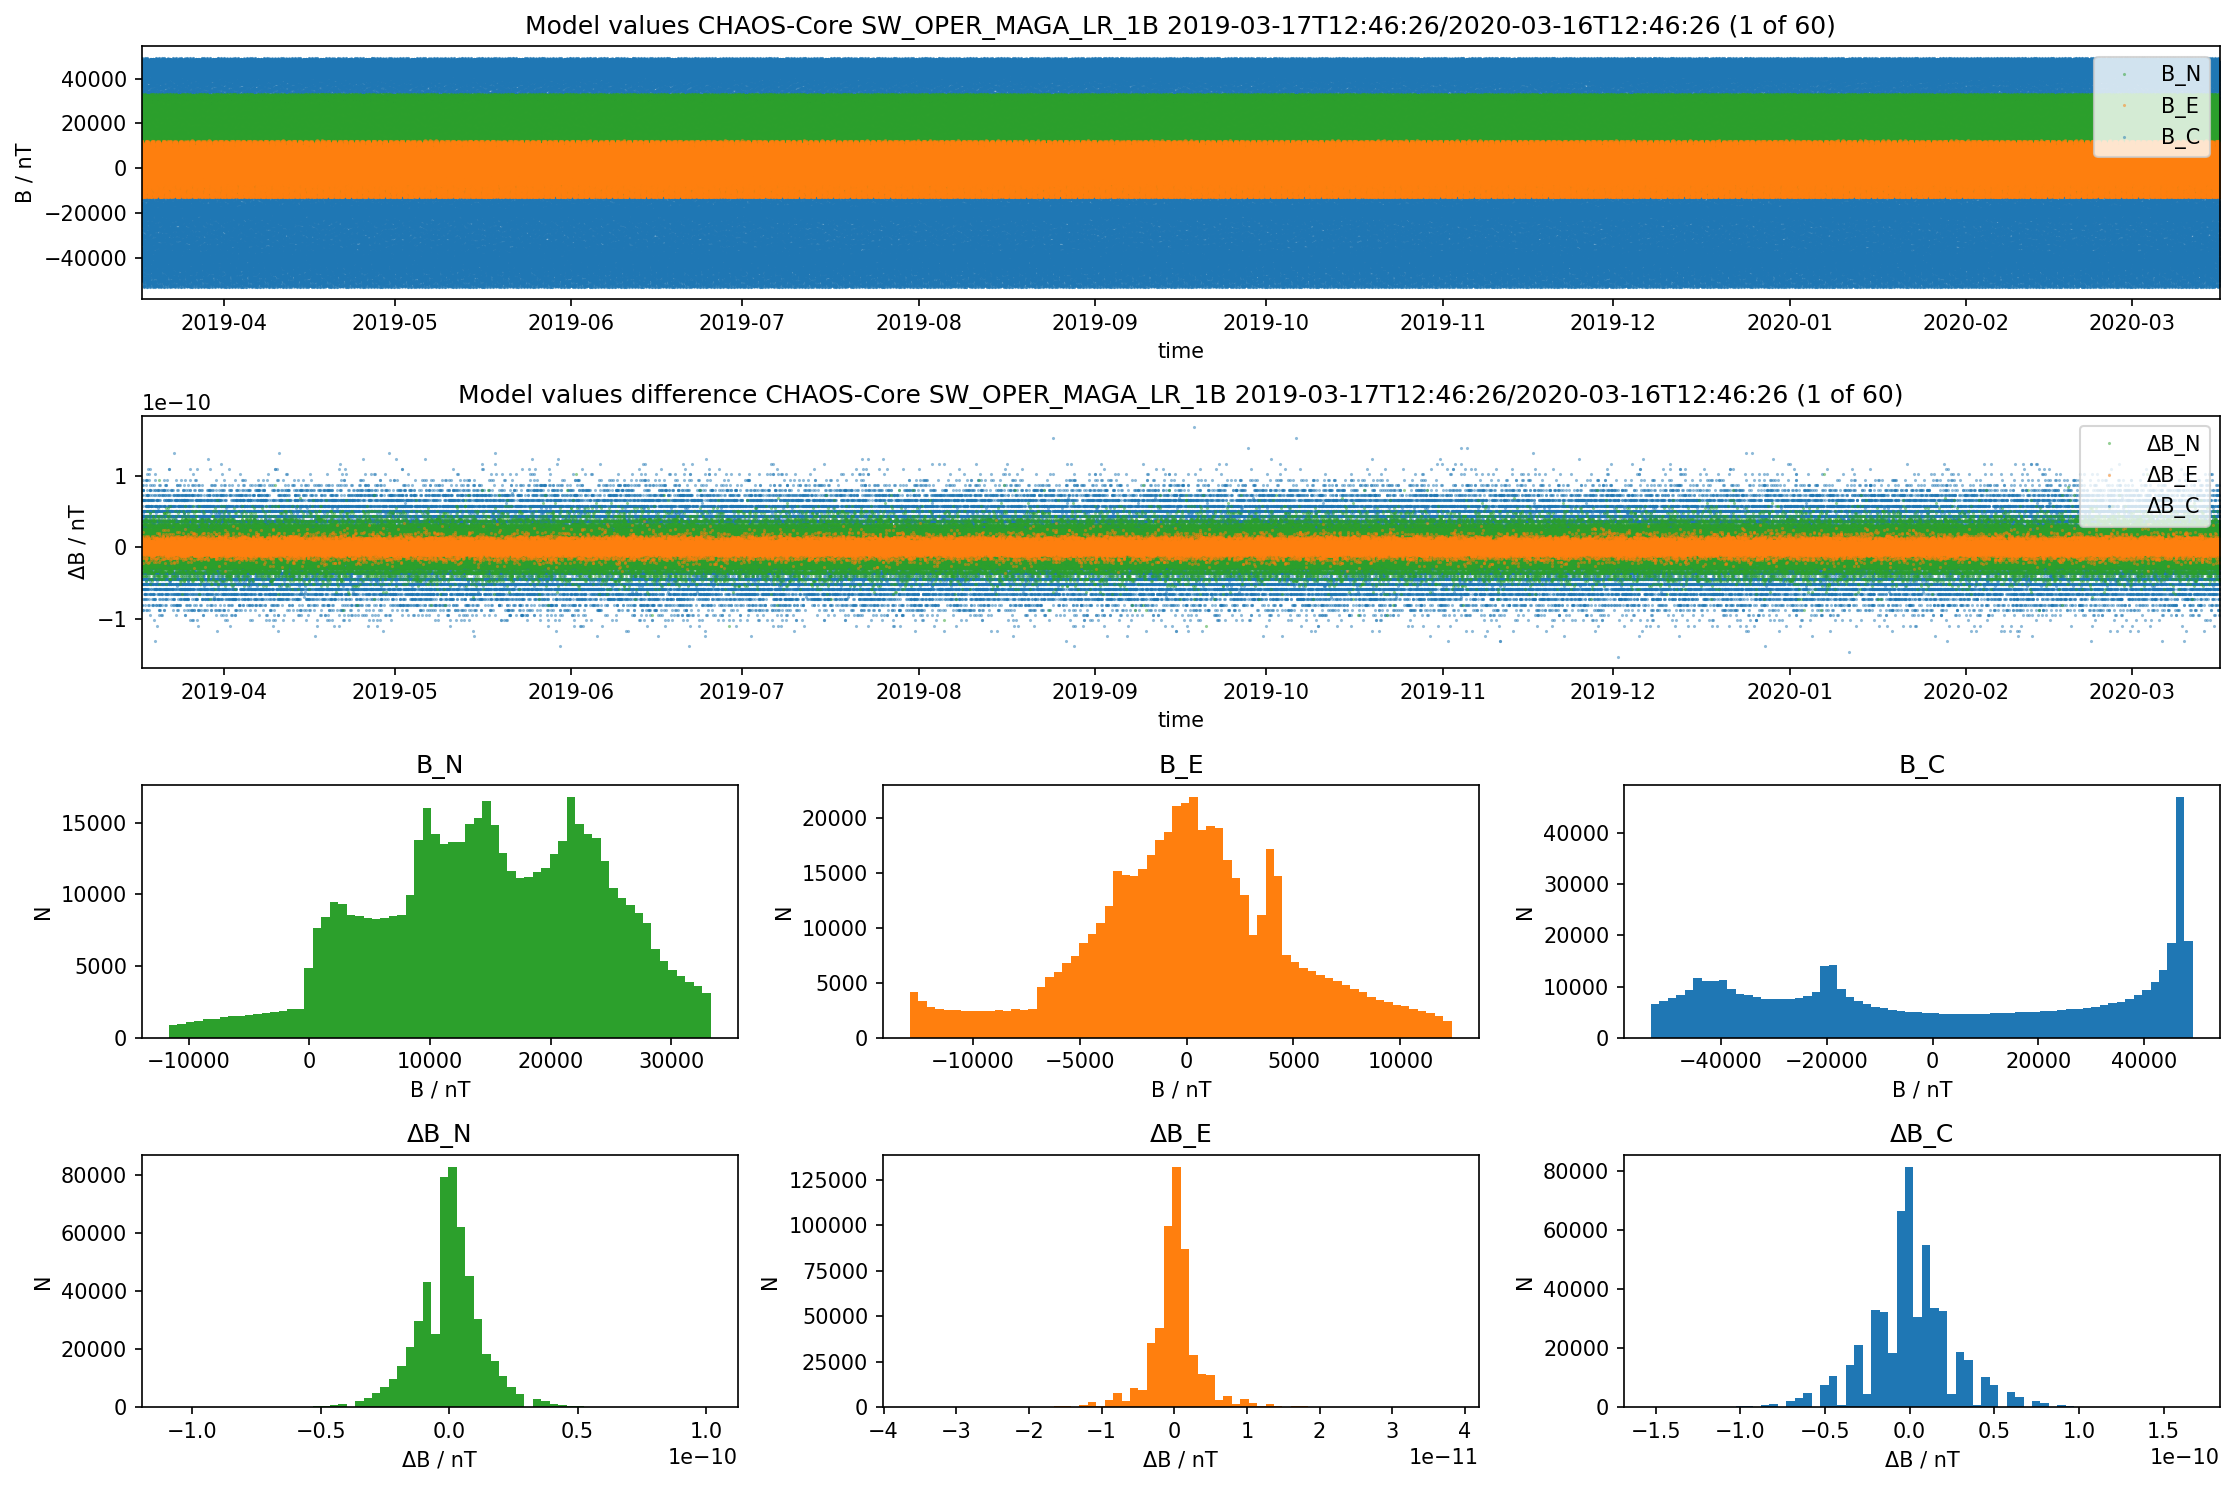

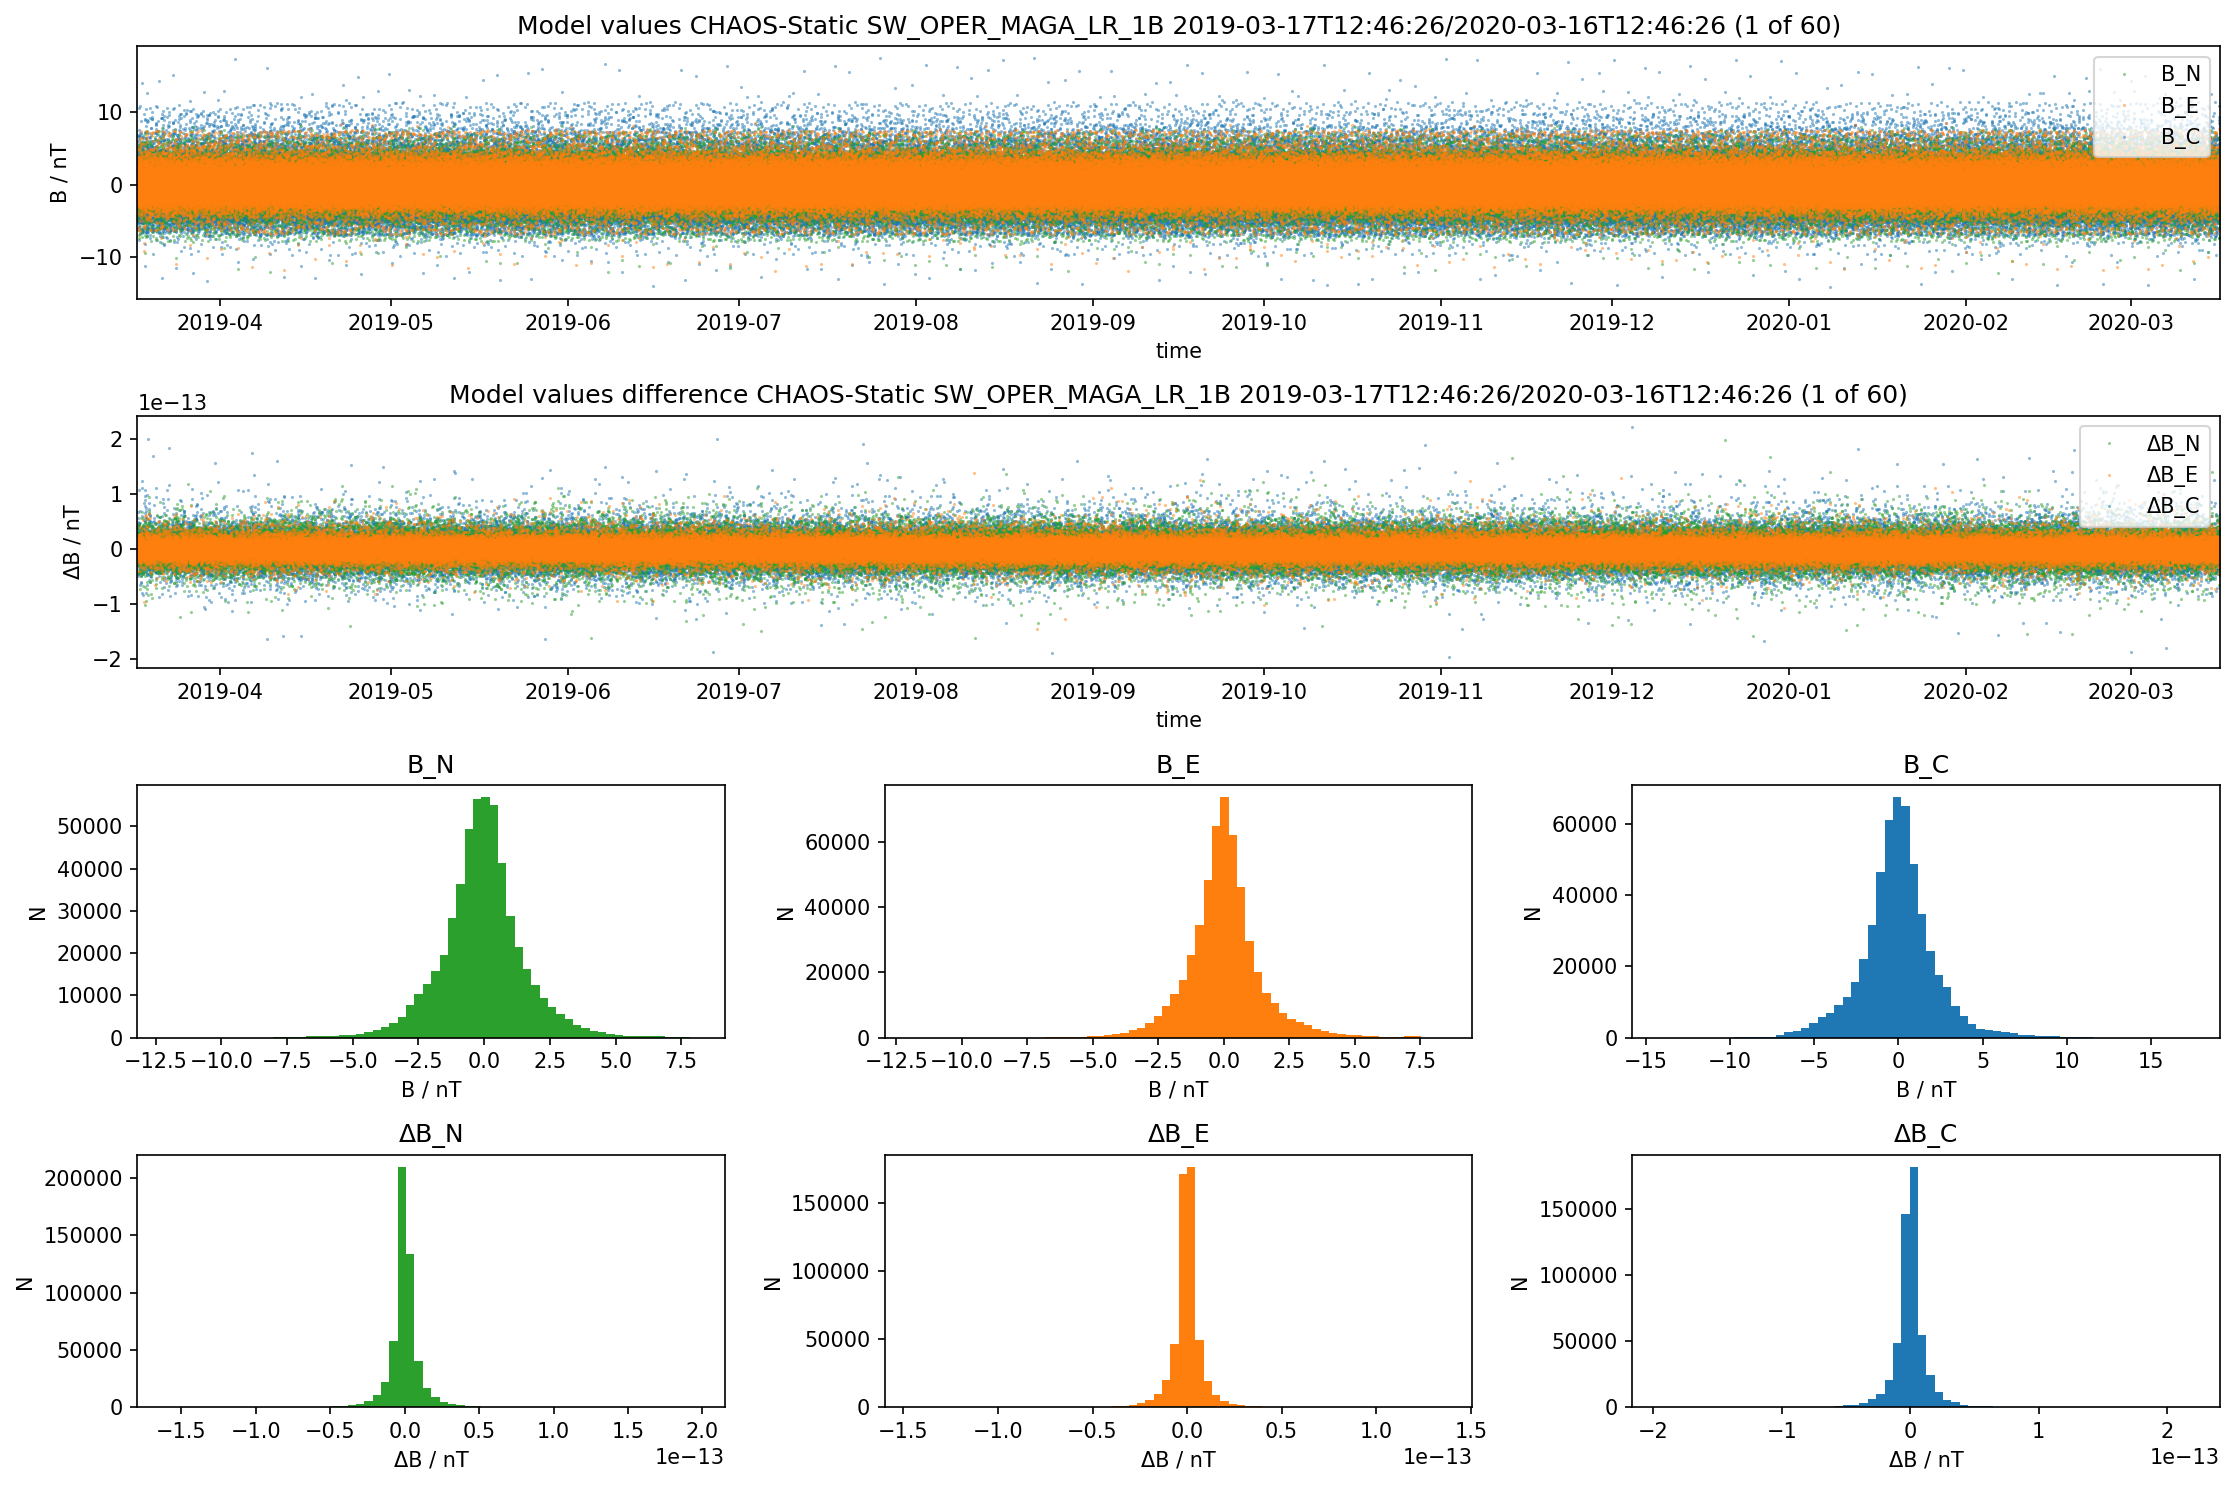

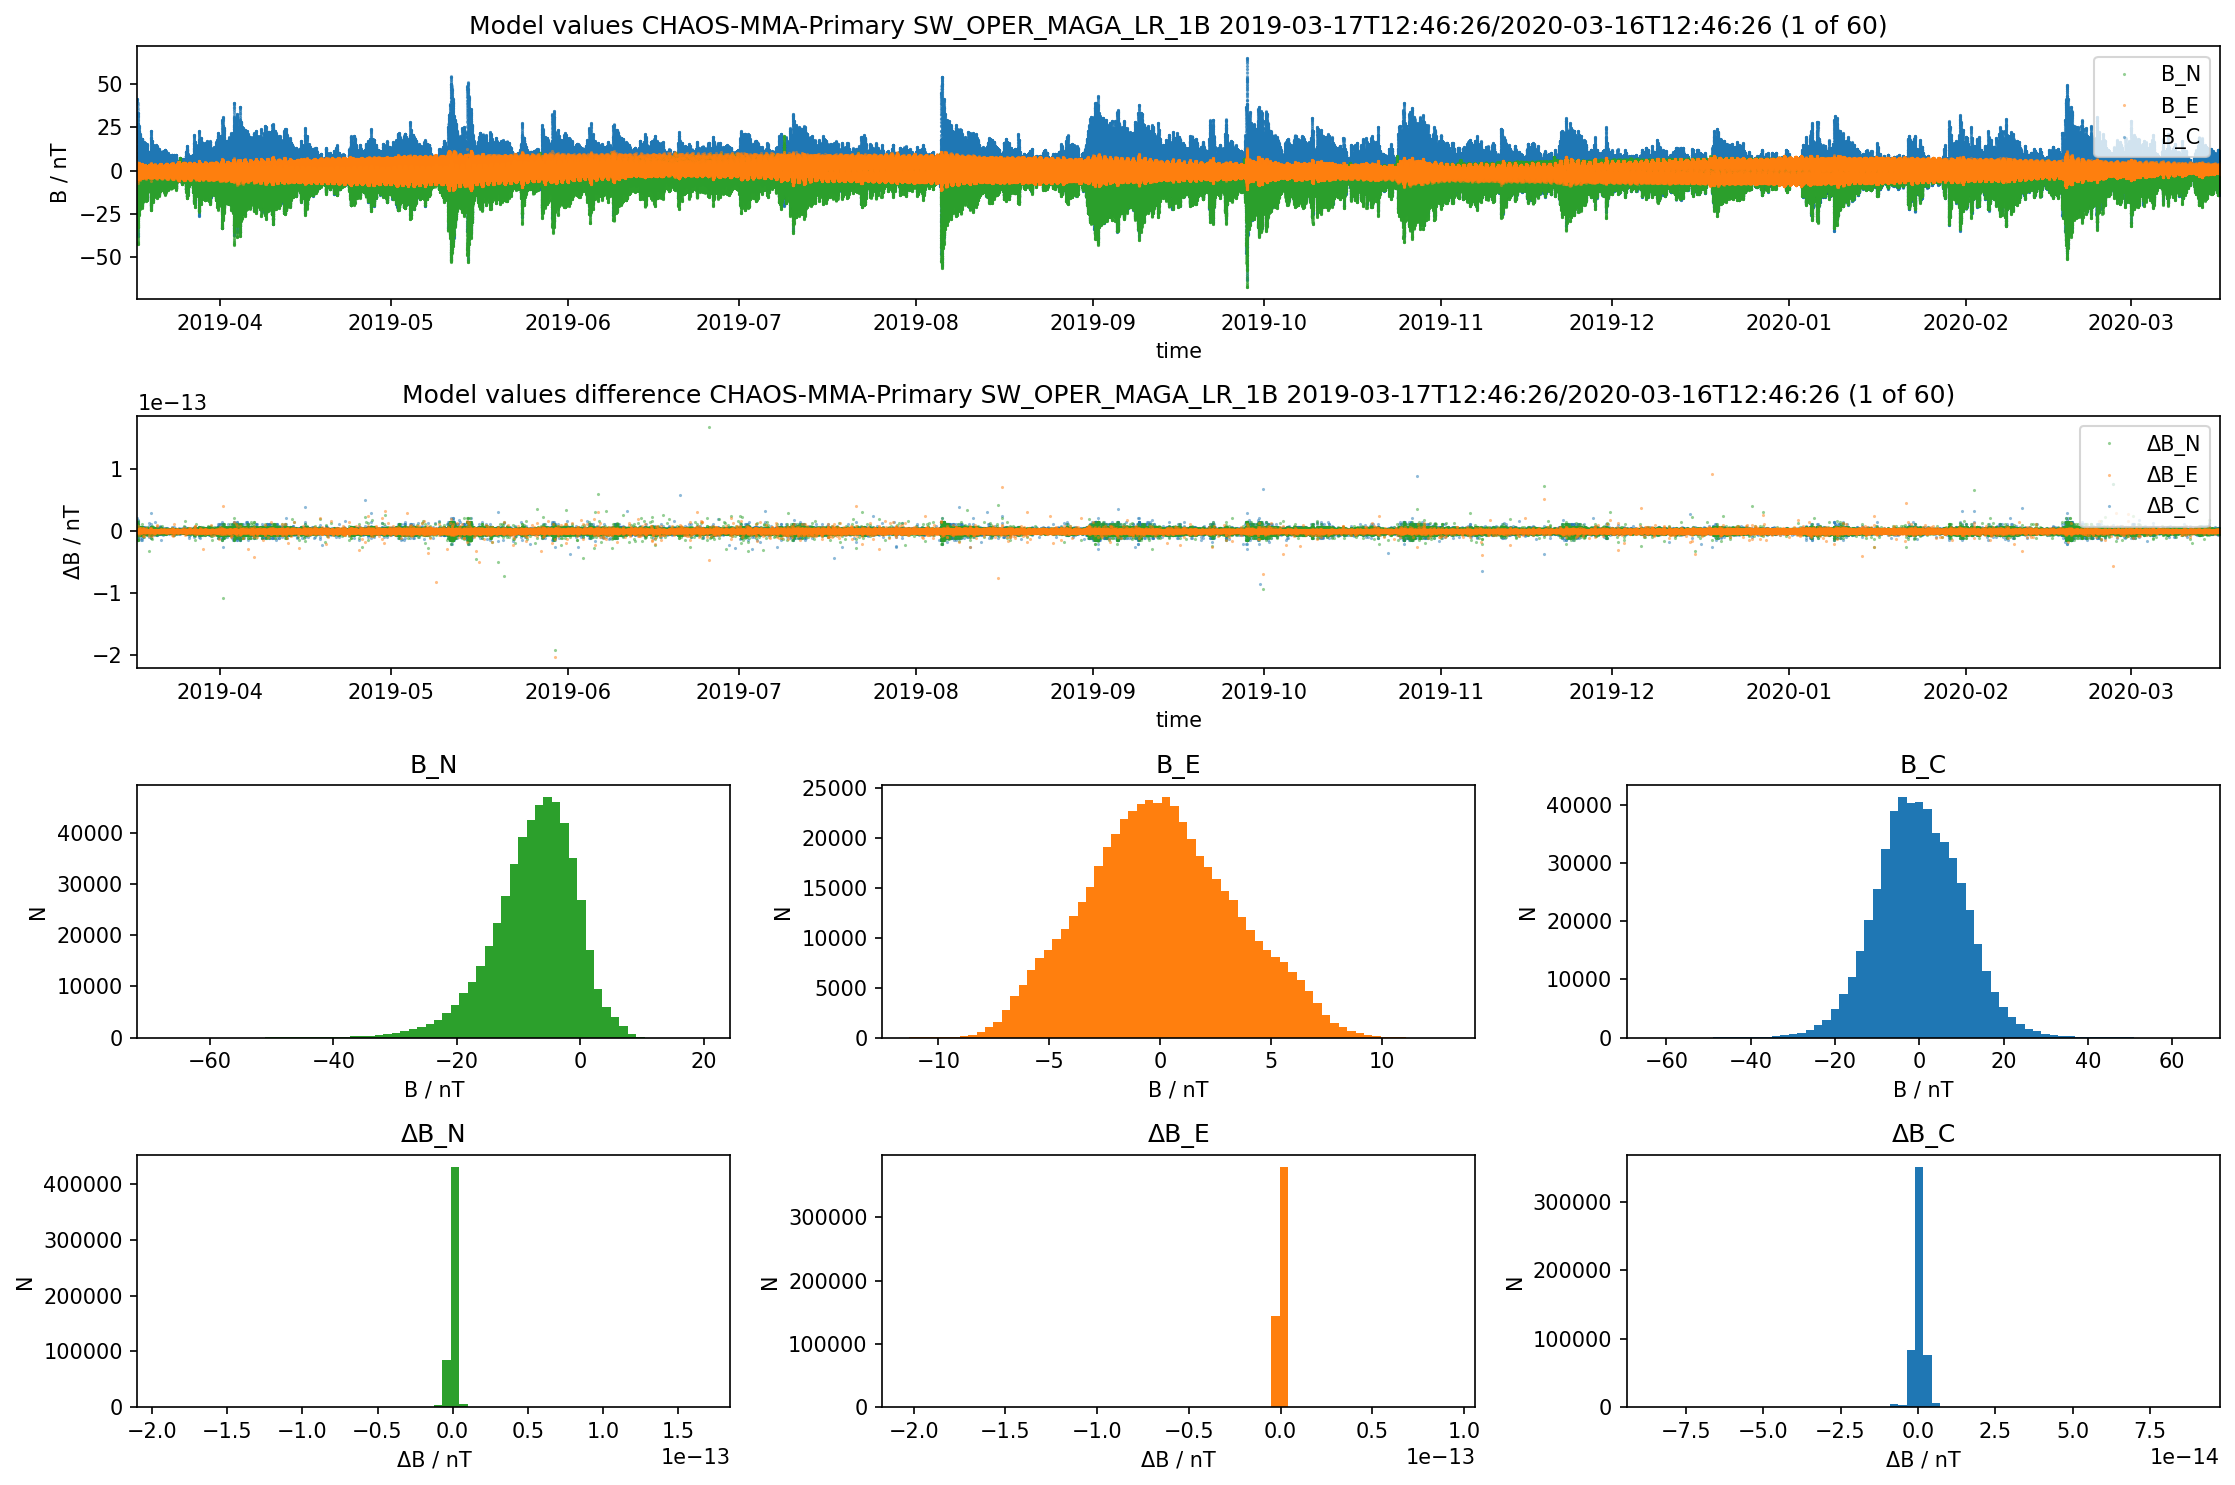

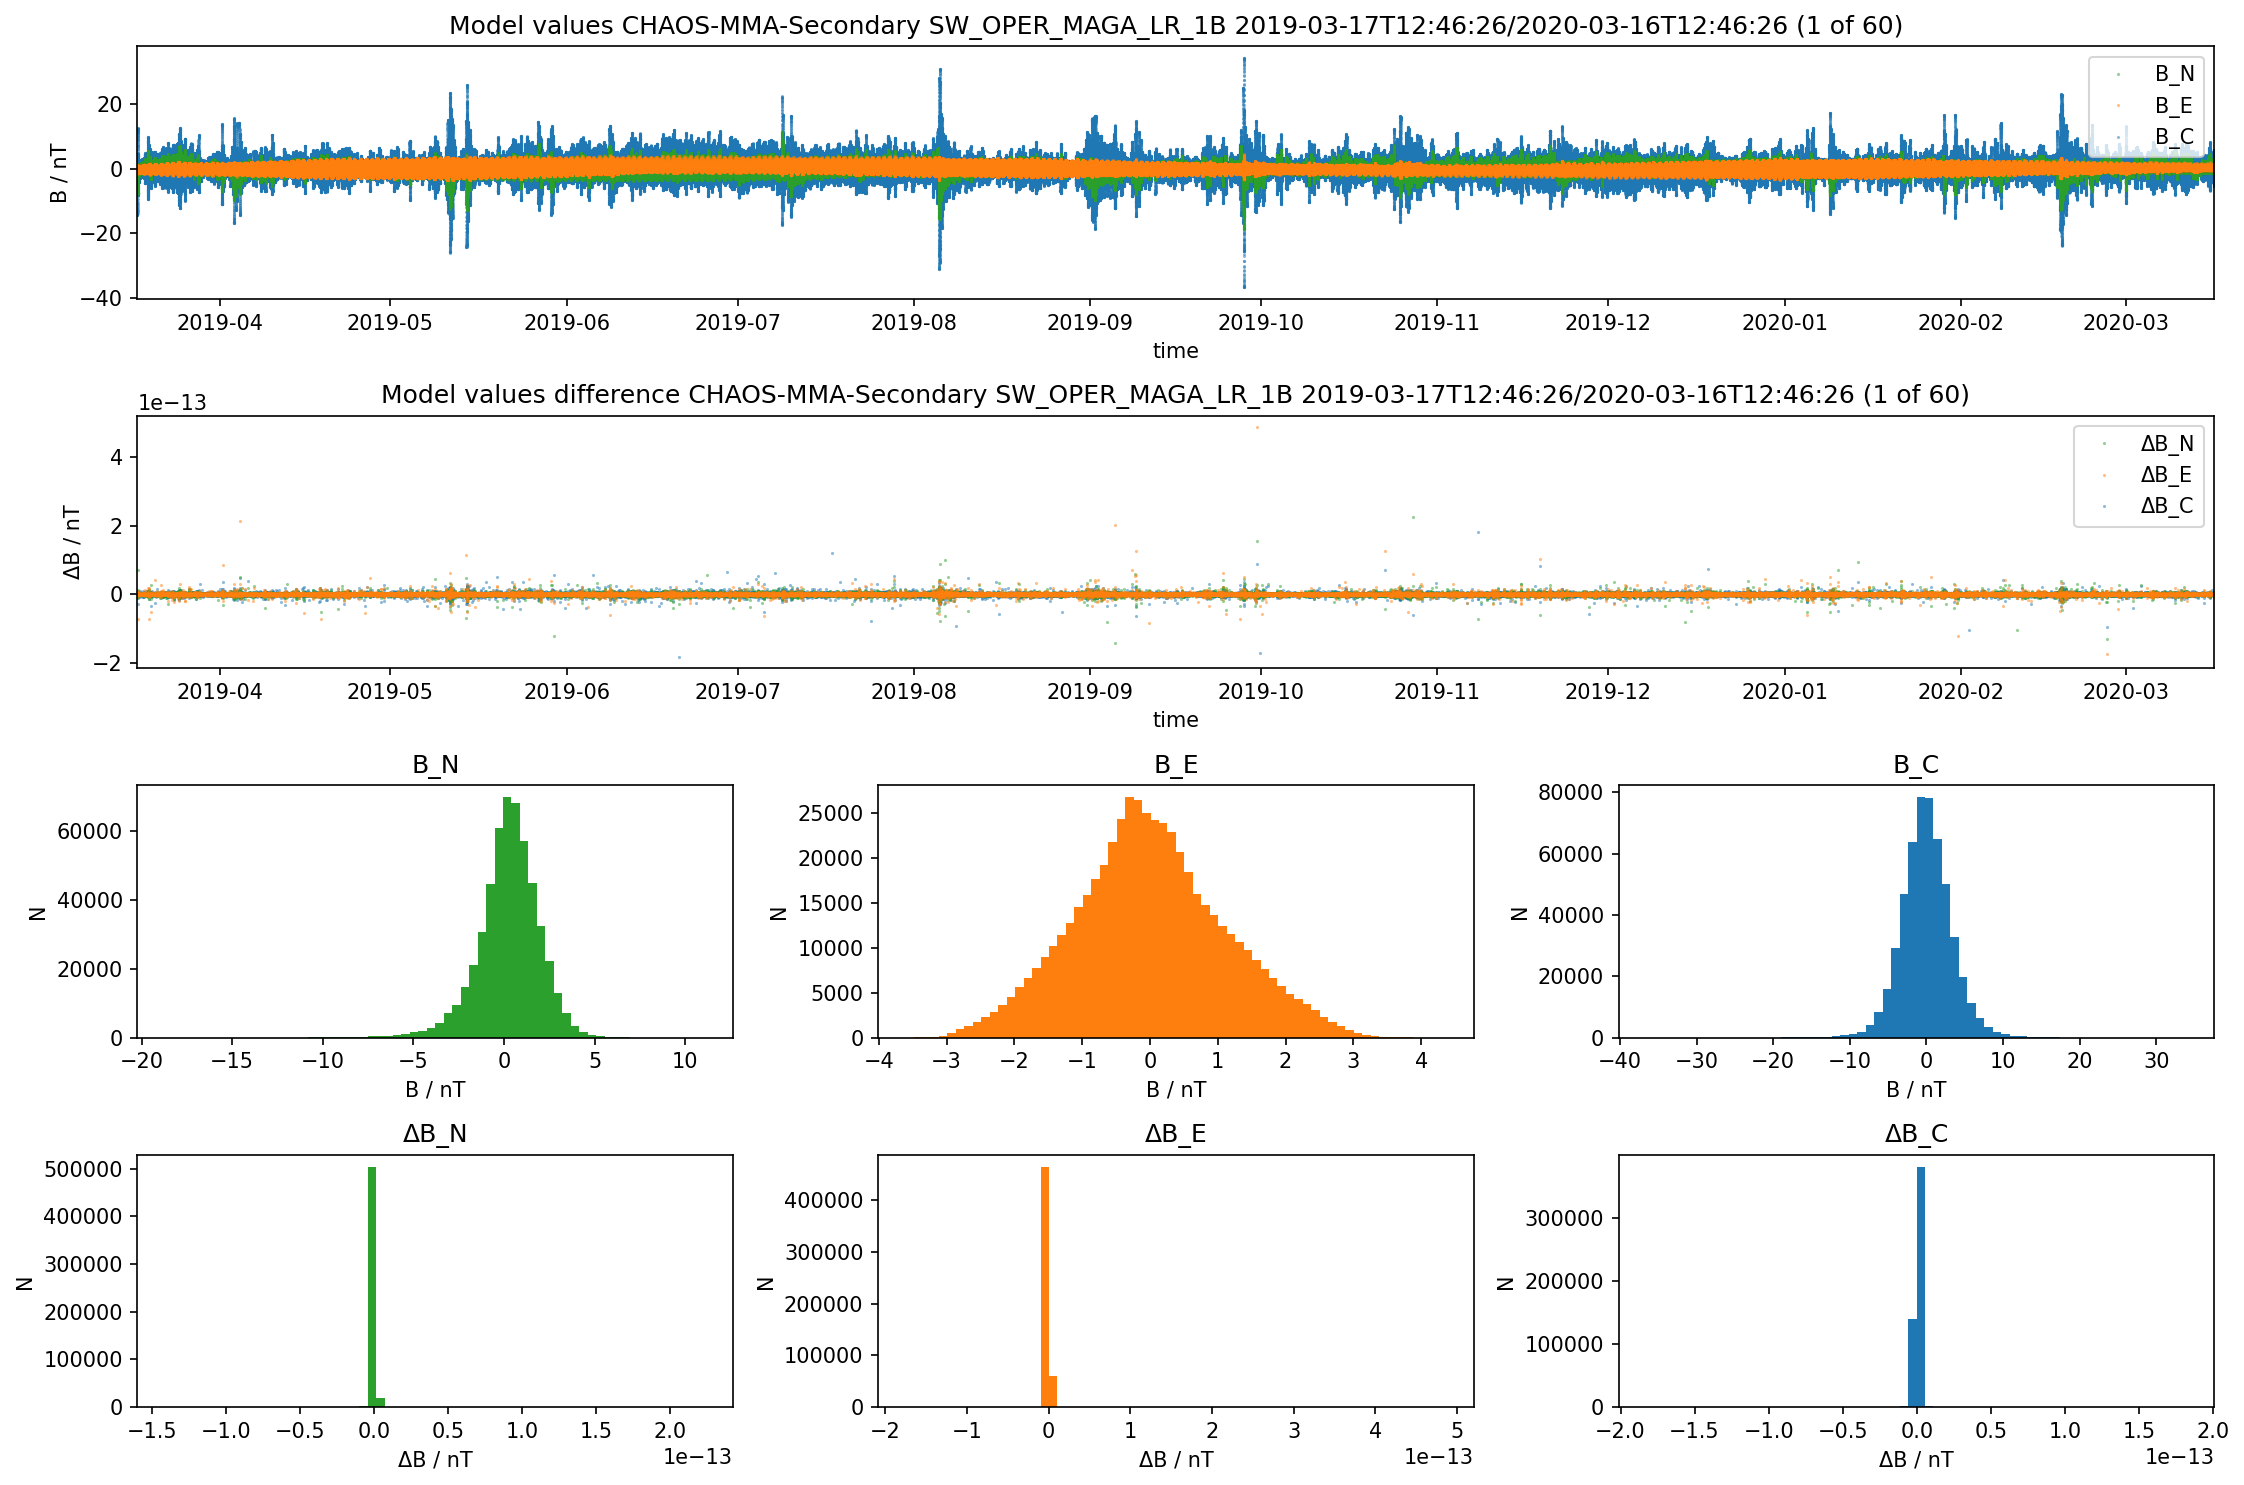

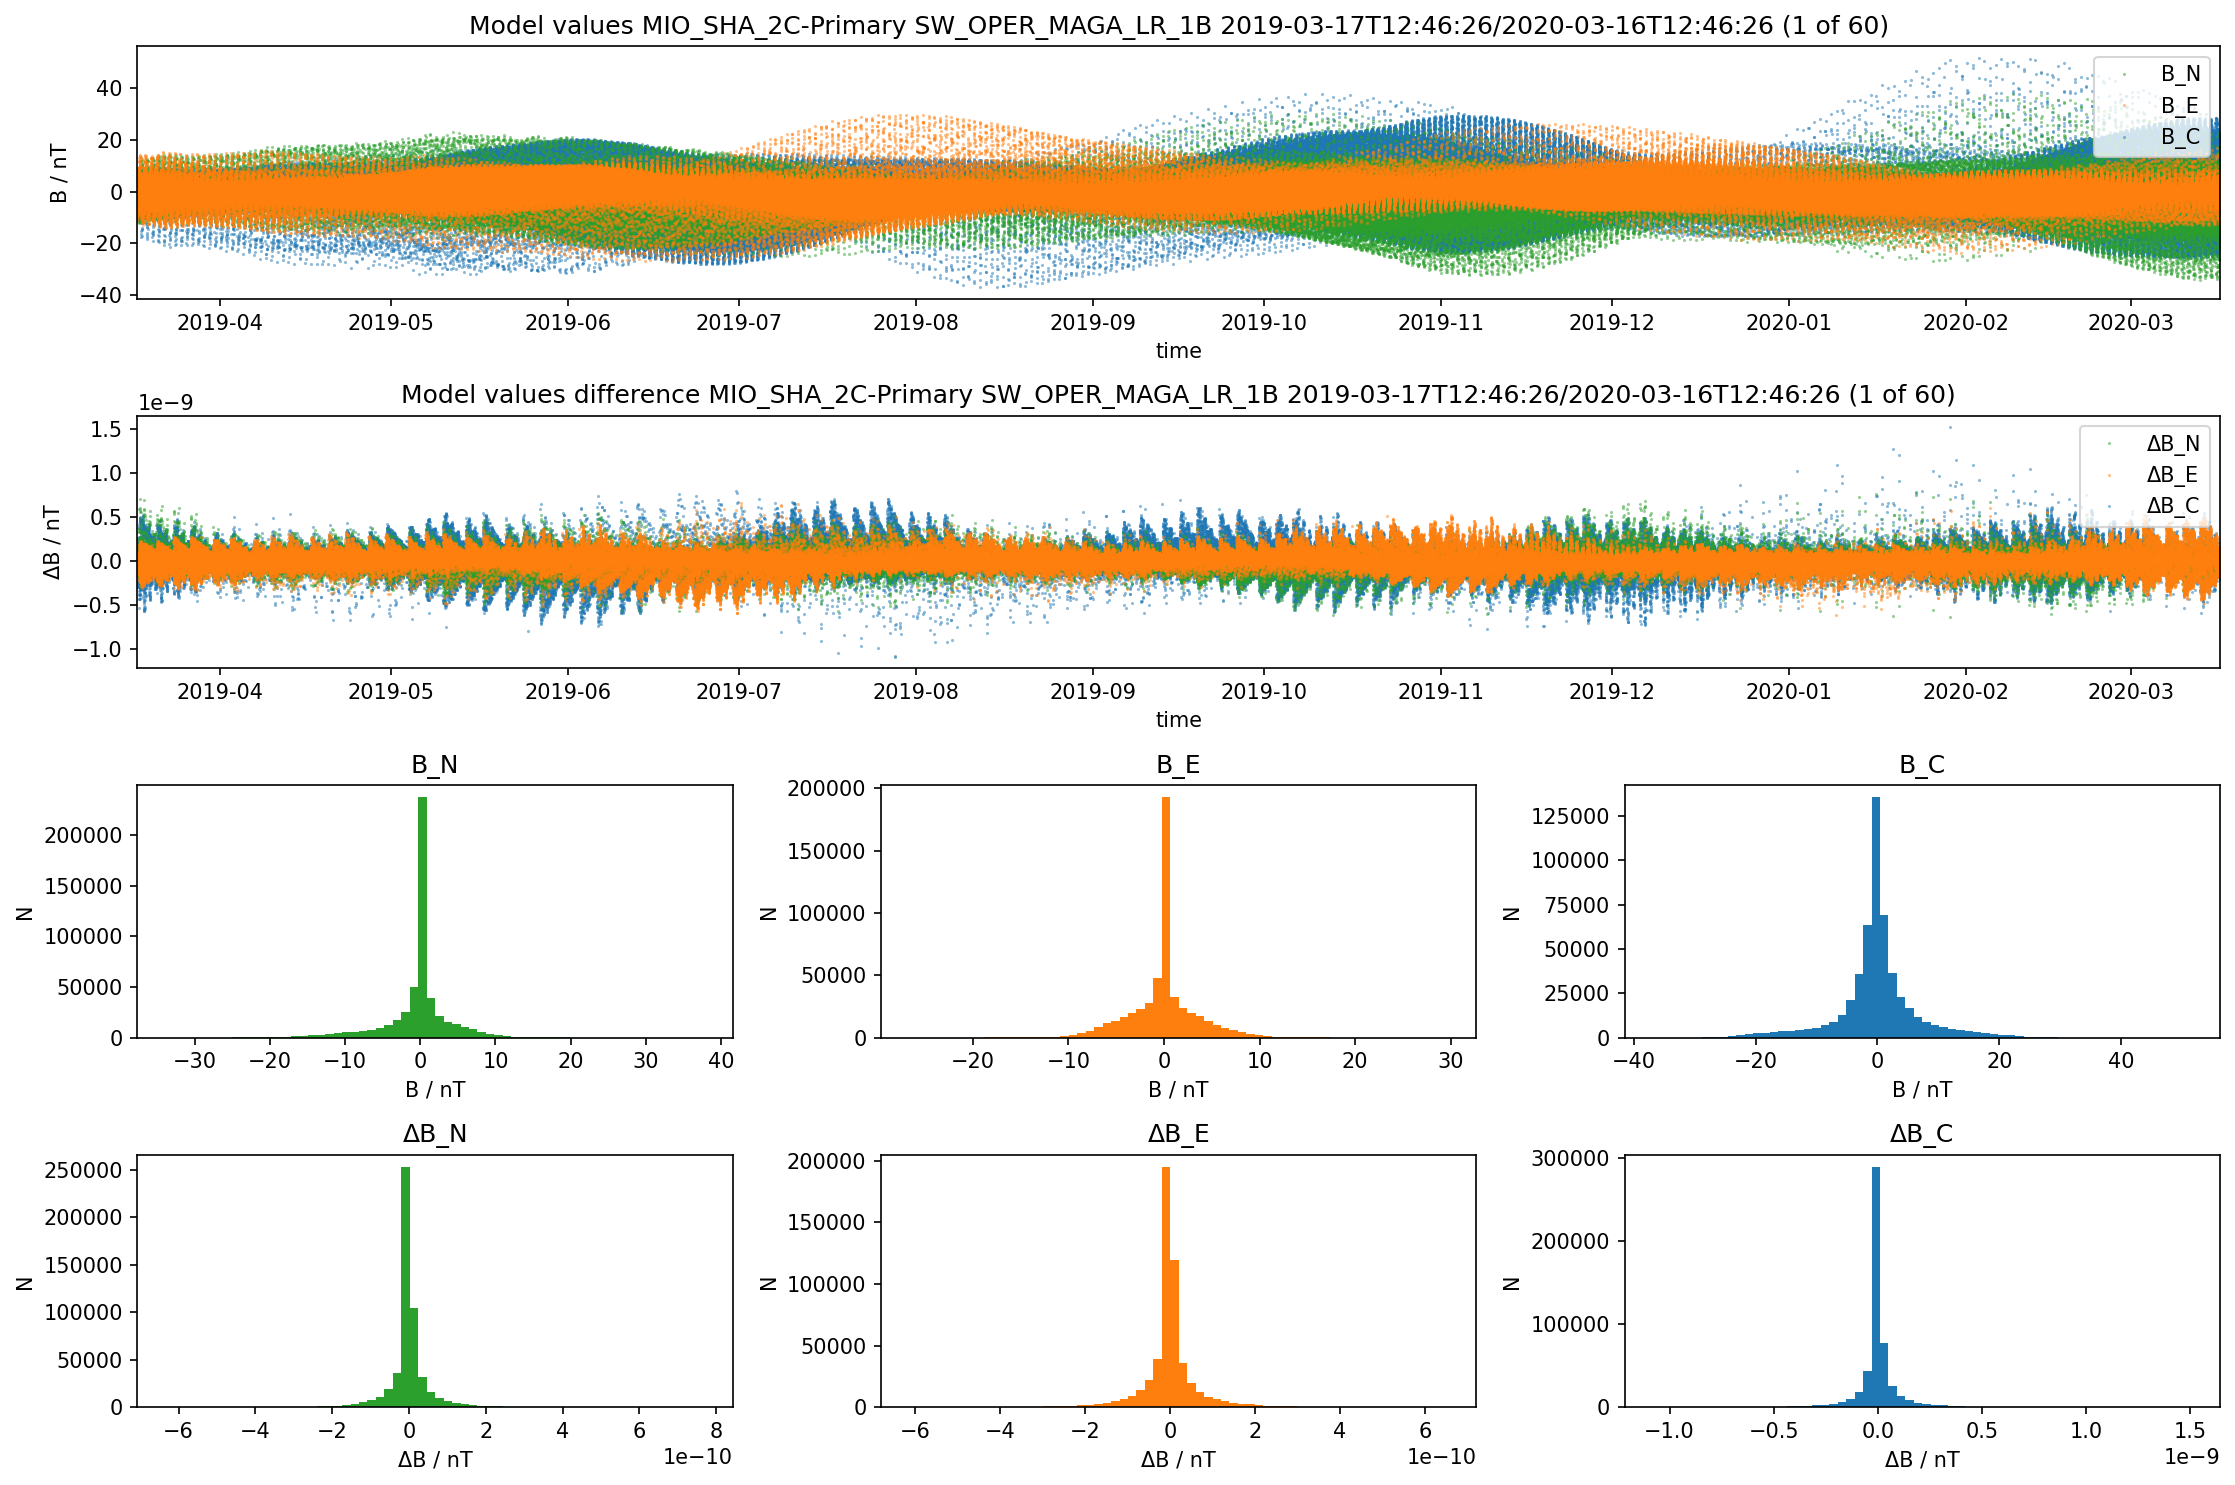

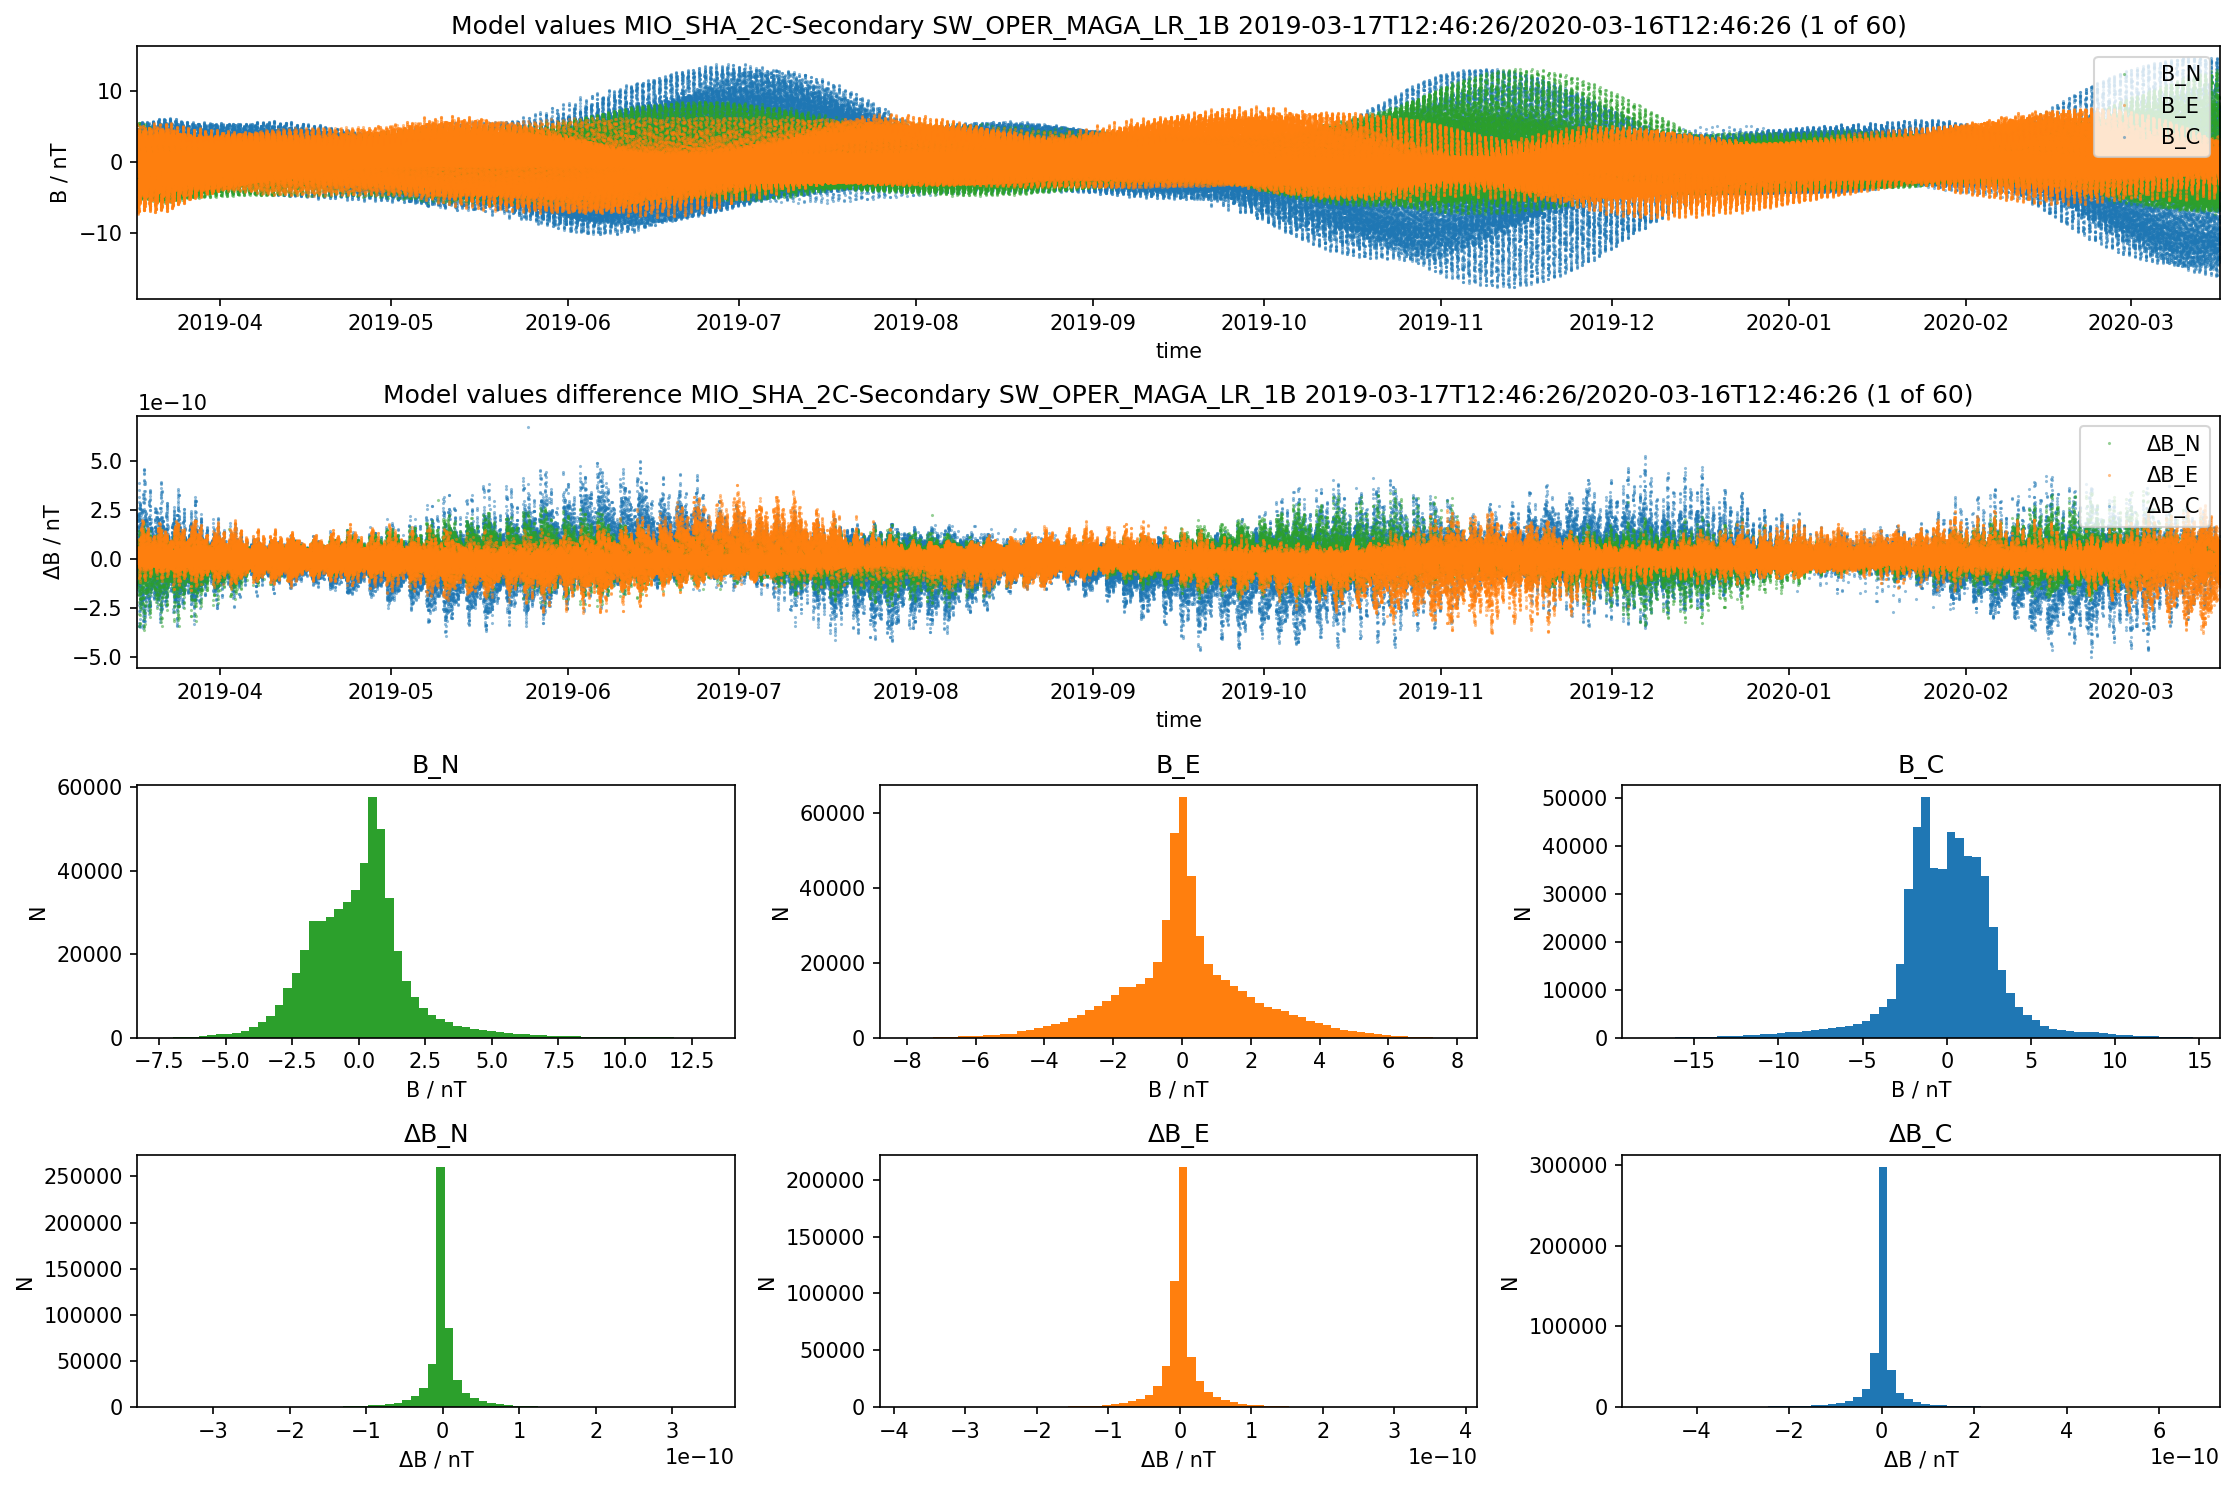

In [2]:
from matplotlib.pyplot import figure, subplot

def _plot_data(ax, x, y):
    options = {"ms": 1, "alpha": 0.5}
    h_c, = ax.plot(x, y[:,2], '.', color="tab:blue", **options)
    h_n, = ax.plot(x, y[:,0], '.', color="tab:green", **options)
    h_e, = ax.plot(x, y[:,1], '.', color="tab:orange", **options)
    return h_n, h_e, h_c


def plot_reference(ax, data, name):
    handlers = _plot_data(ax, data["Timestamp"], data["reference"][name])    
    ax.set_xlim([data["Timestamp"].min(), data["Timestamp"].max()])
    ax.set_xlabel("time")
    ax.set_ylabel("B / nT")
    ax.set_title(f"Model values {name} {data['info']['collection']} {data['info']['start']}/{data['info']['end']} (1 of 60)")
    ax.legend(handlers, ["B_N", "B_E", "B_C"], loc="upper right")


def plot_delta(ax, data, name):
    handlers = _plot_data(ax, data["Timestamp"], data["tested"][name] - data["reference"][name])
    ax.set_xlim([data["Timestamp"].min(), data["Timestamp"].max()])
    ax.set_xlabel("time")
    ax.set_ylabel("ΔB / nT")
    ax.set_title(f"Model values difference {name} {data['info']['collection']} {data['info']['start']}/{data['info']['end']} (1 of 60)")
    ax.legend(handlers, ["ΔB_N", "ΔB_E", "ΔB_C"], loc="upper right")

    
def plot_reference_histogram(ax, data, name, idx, label, **options):
    ax.hist(data["reference"][name][:,idx], bins=64, **options)
    ax.set_title(label)
    ax.set_xlabel("B / nT")
    ax.set_ylabel("N")

    
def plot_delta_histogram(ax, data, name, idx, label, **options):
    ax.hist(data["tested"][name][:,idx] - data["reference"][name][:,idx], bins=64, **options)
    ax.set_title(label)
    ax.set_xlabel("ΔB / nT")
    ax.set_ylabel("N")

    
model_names = data["info"]["model_names"]

for model_name in model_names:
    fig = figure(figsize=(15, 10), dpi=150)
    ax = subplot(4, 1, 1)
    plot_reference(ax, data, model_name)
    ax = subplot(4, 1, 2)
    plot_delta(ax, data, model_name)
    ax = subplot(4, 3, 7)
    plot_reference_histogram(ax, data, model_name, 0, "B_N", color="tab:green")
    ax = subplot(4, 3, 8)
    plot_reference_histogram(ax, data, model_name, 1, "B_E", color="tab:orange")
    ax = subplot(4, 3, 9)
    plot_reference_histogram(ax, data, model_name, 2, "B_C", color="tab:blue")
    ax = subplot(4, 3, 10)
    plot_delta_histogram(ax, data, model_name, 0, "ΔB_N", color="tab:green")
    ax = subplot(4, 3, 11)
    plot_delta_histogram(ax, data, model_name, 1, "ΔB_E", color="tab:orange")
    ax = subplot(4, 3, 12)
    plot_delta_histogram(ax, data, model_name, 2, "ΔB_C", color="tab:blue")
    fig.tight_layout()

### MIO inputs

Comparing additional input parameters used the MIO model. 

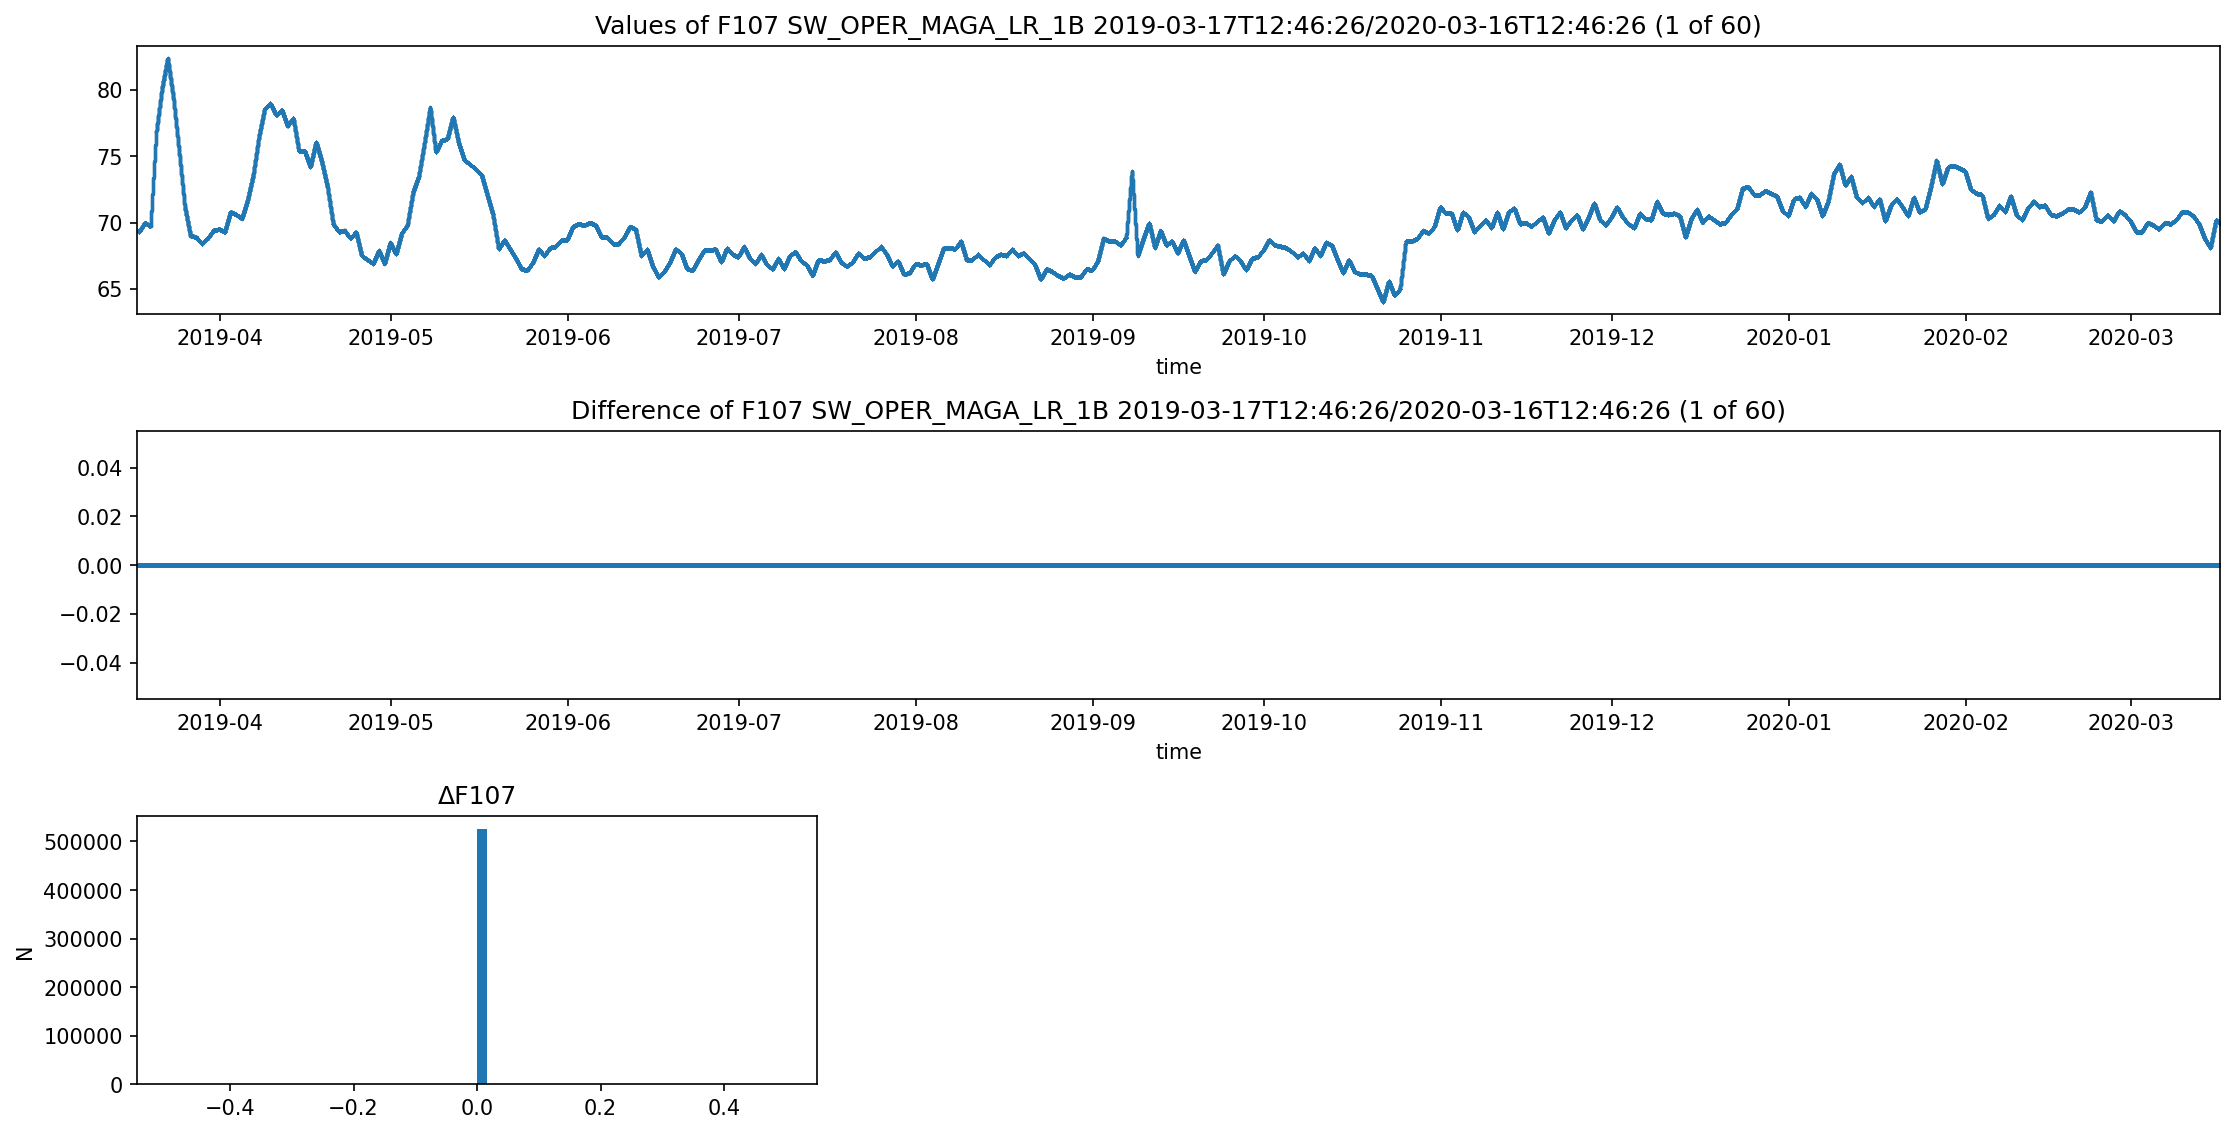

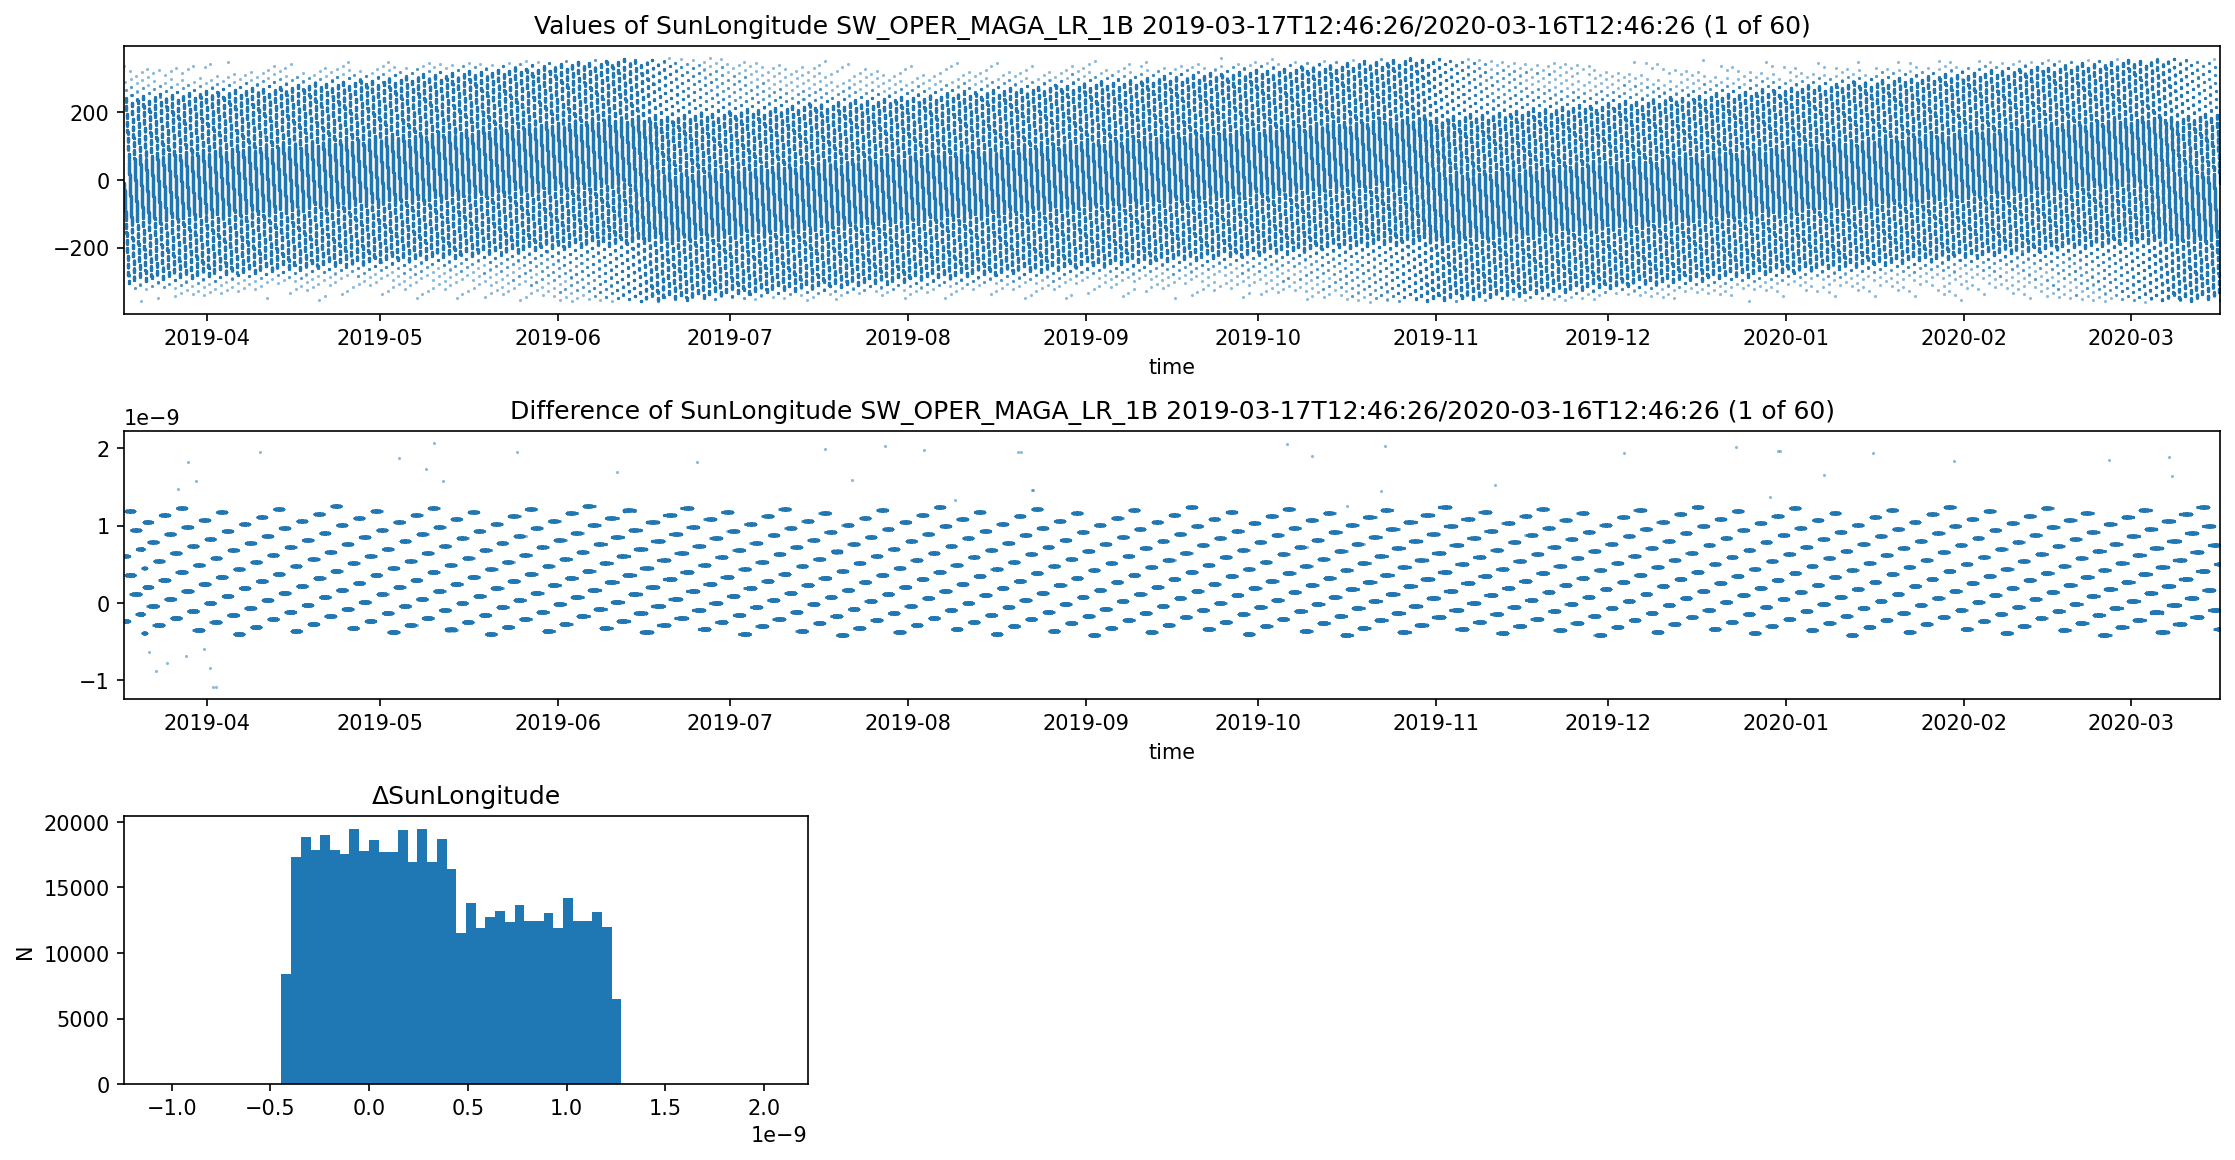

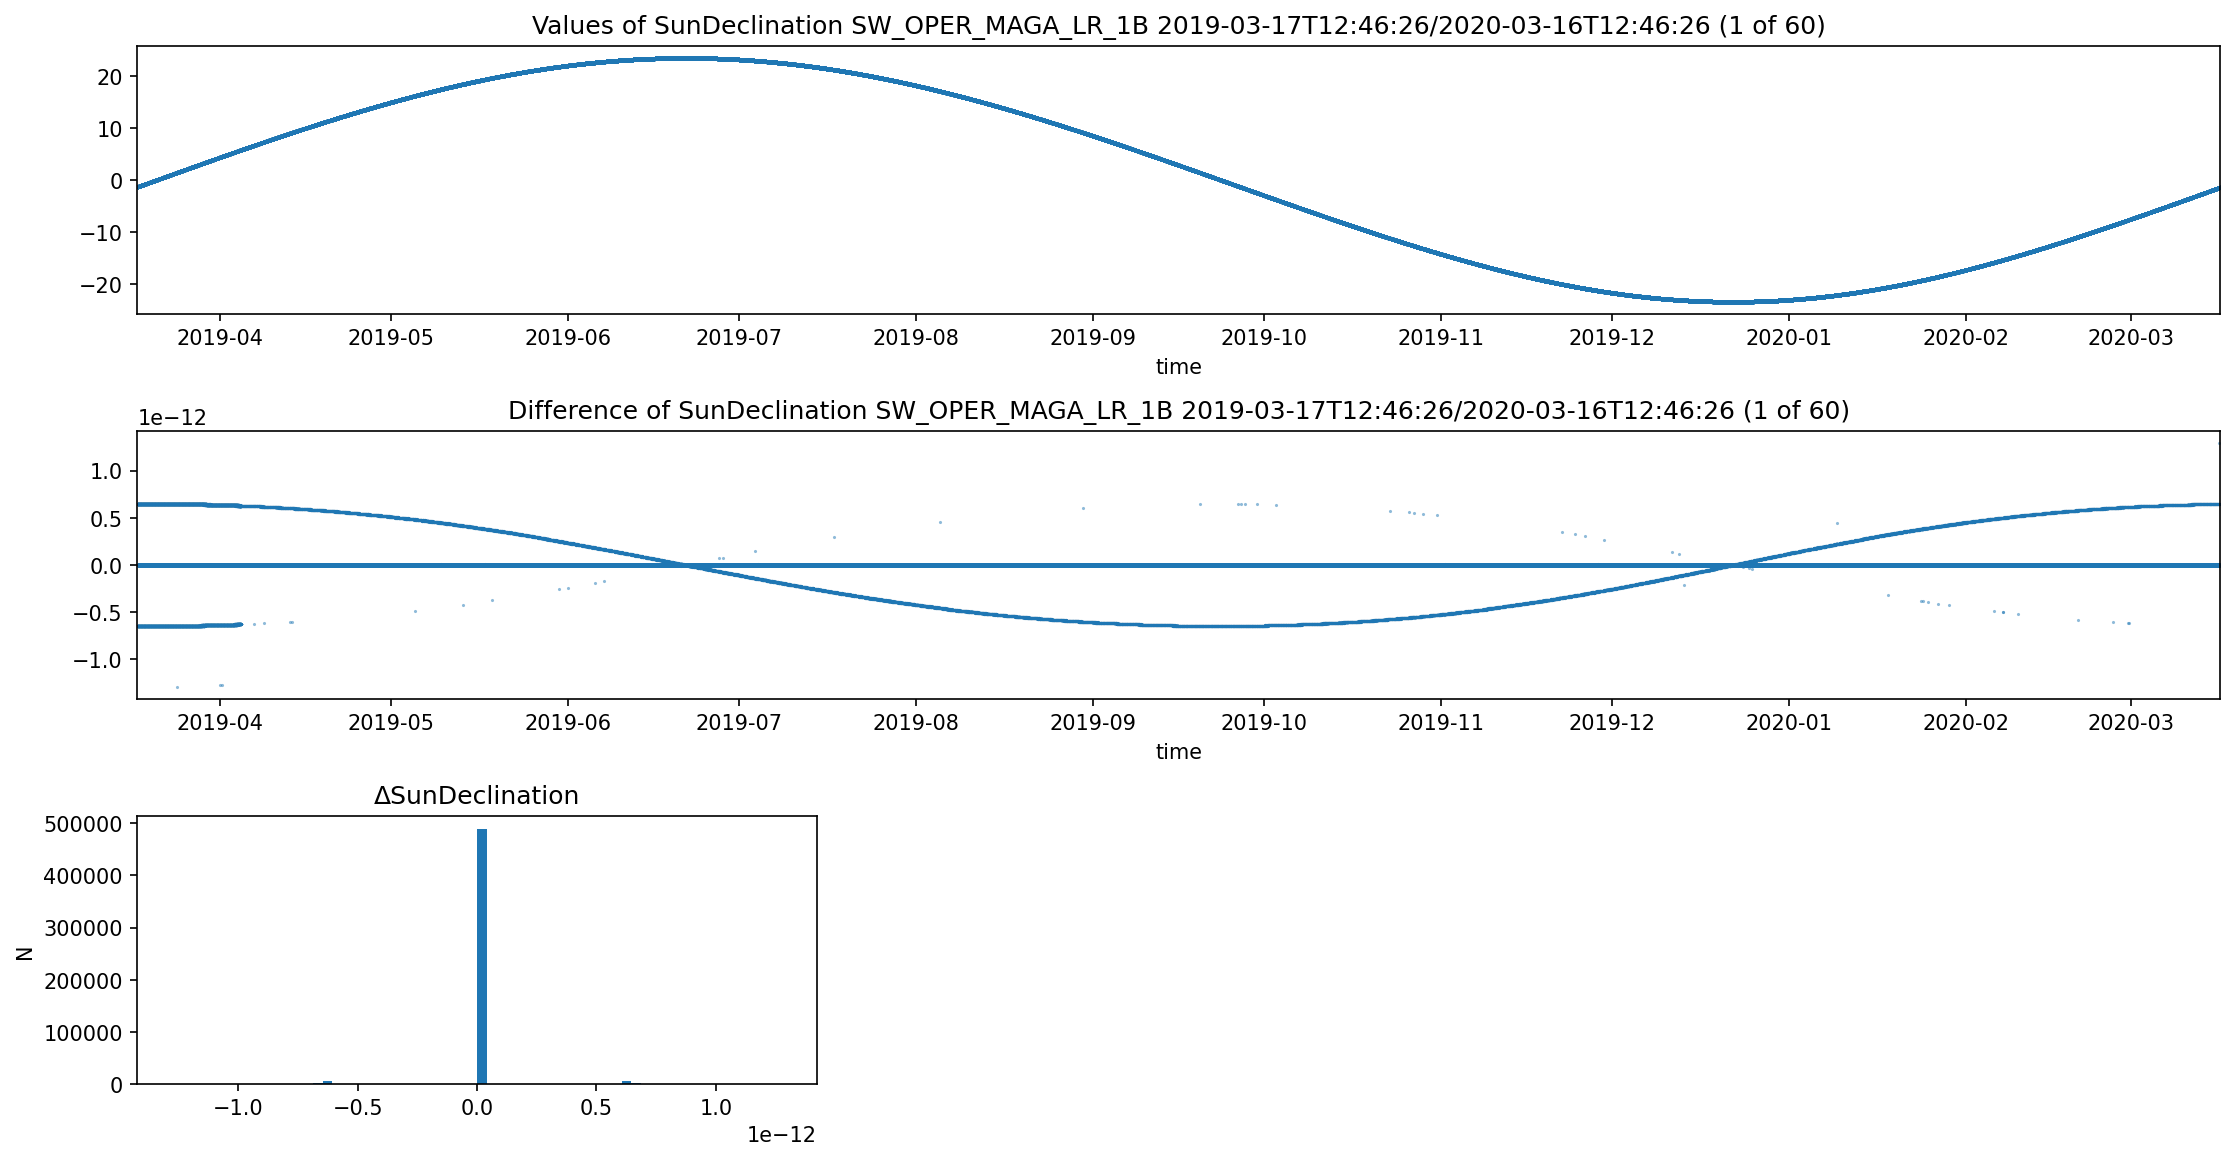

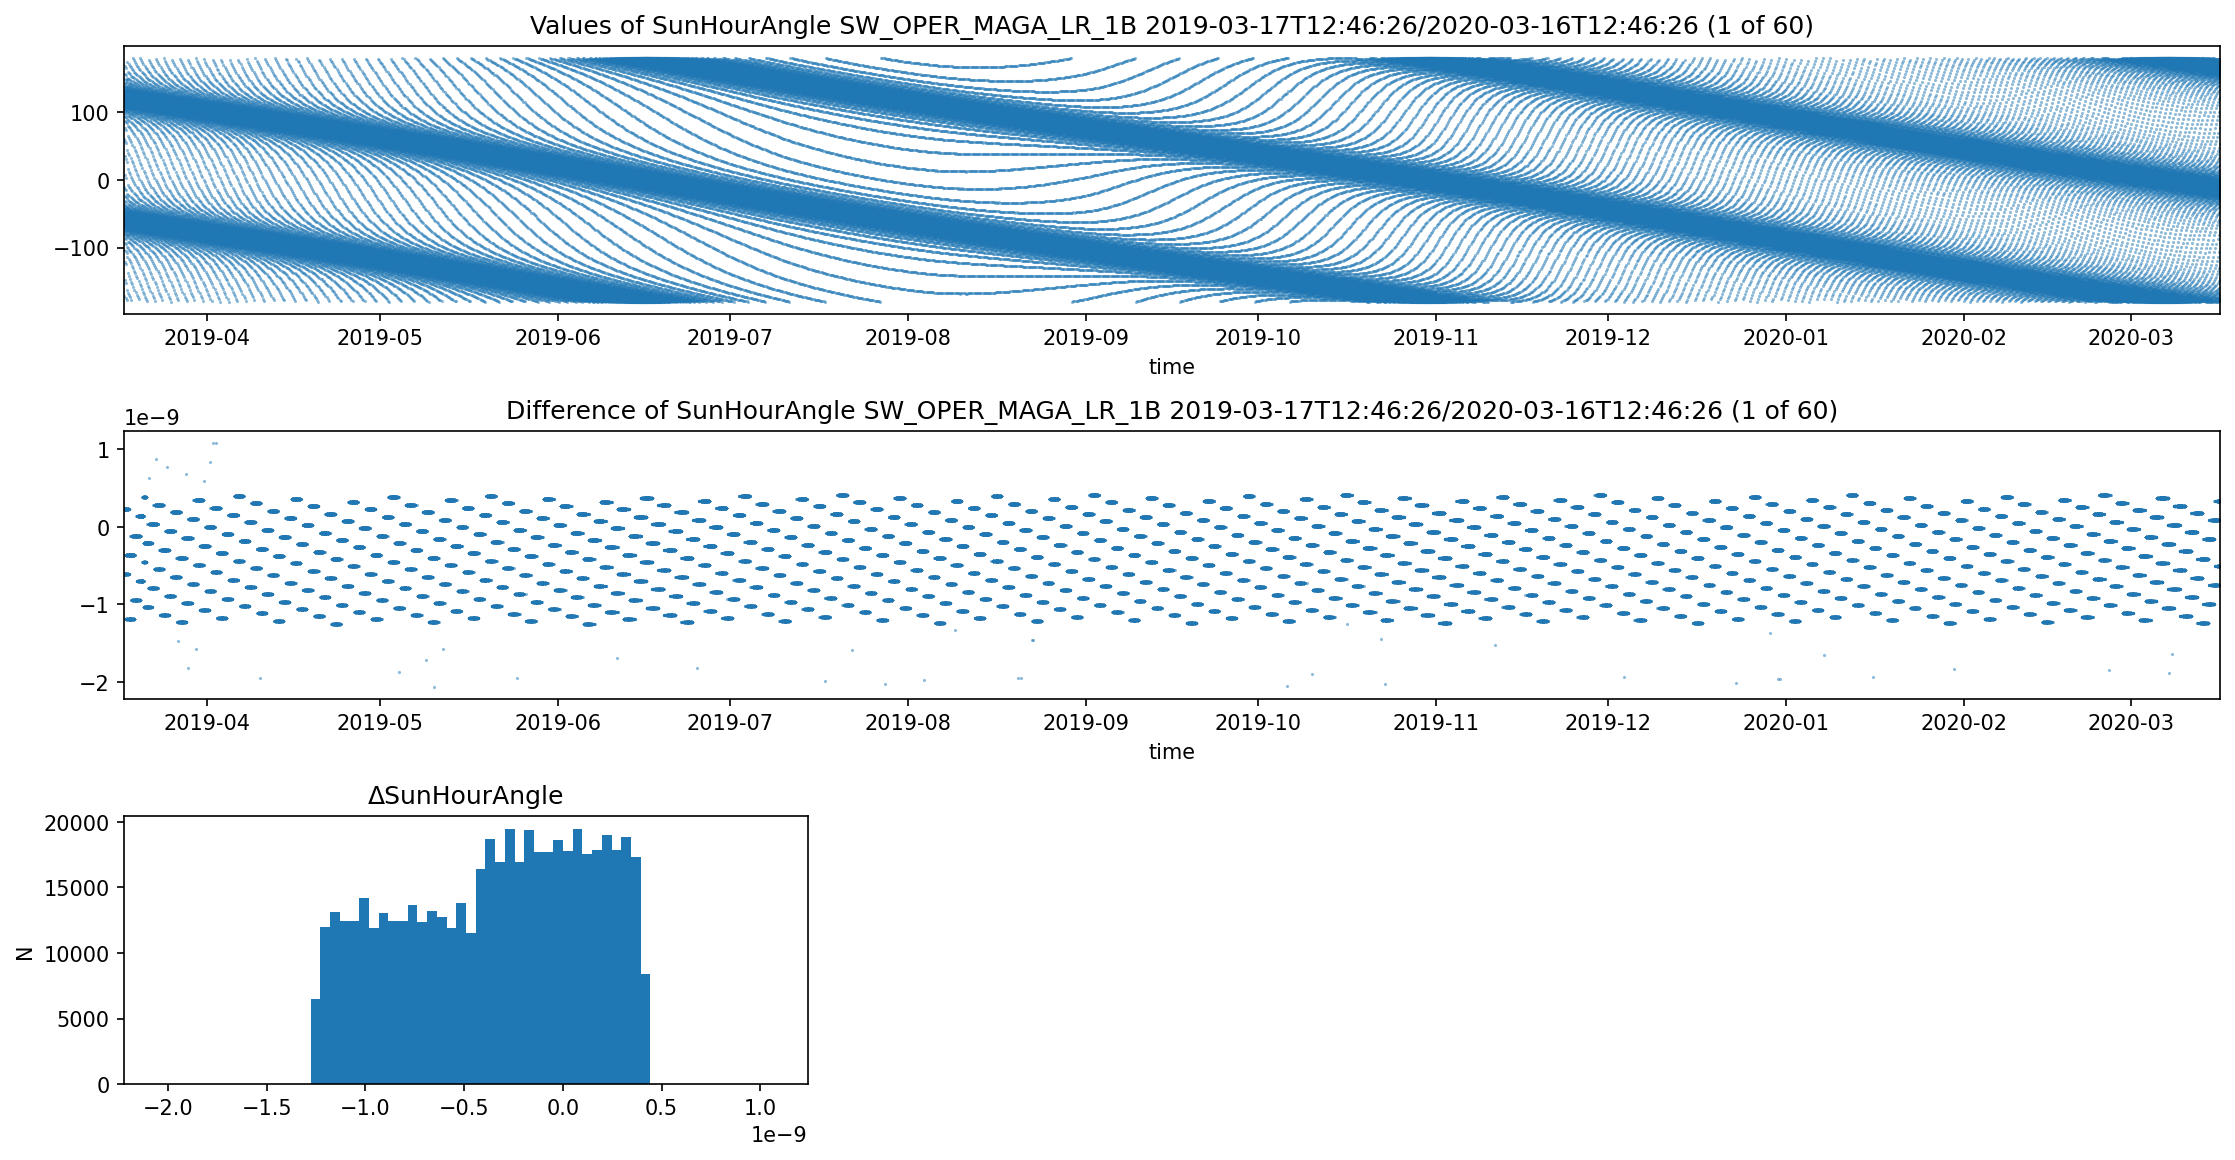

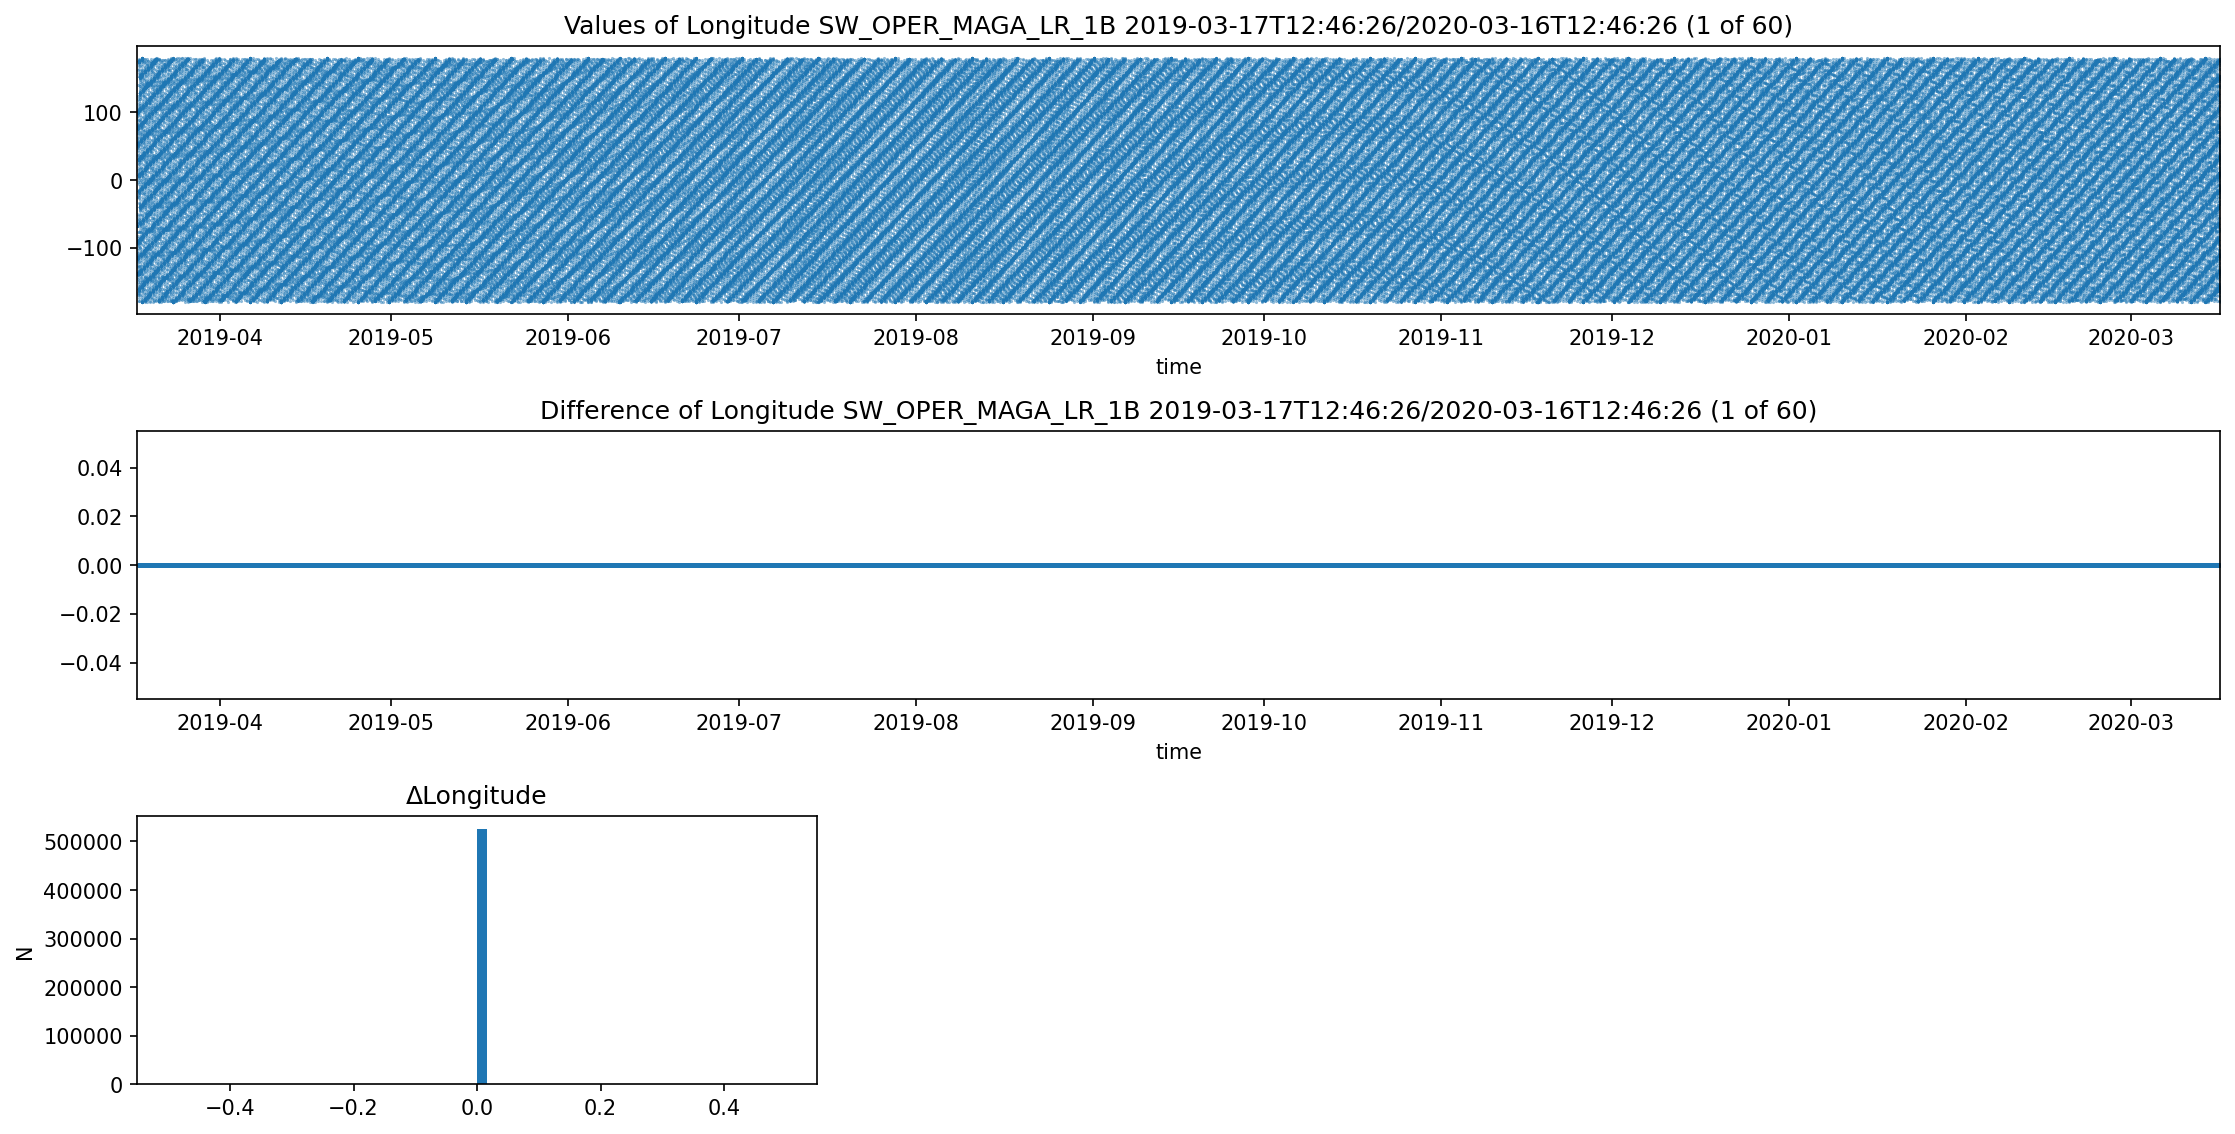

In [3]:
from matplotlib.pyplot import figure, subplot

def _plot_data(ax, x, y):
    options = {"ms": 1, "alpha": 0.5}
    h, = ax.plot(x, y, '.', color="tab:blue", **options)
    return h


def plot_reference(ax, data, name):
    handlers = _plot_data(ax, data["Timestamp"], data["reference"][name])    
    ax.set_xlim([data["Timestamp"].min(), data["Timestamp"].max()])
    ax.set_xlabel("time")
    #ax.set_ylabel("B / nT")
    ax.set_title(f"Values of {name} {data['info']['collection']} {data['info']['start']}/{data['info']['end']} (1 of 60)")
    #ax.legend(handlers, ["B_N", "B_E", "B_C"], loc="upper right")

def plot_delta(ax, data, name):
    handlers = _plot_data(ax, data["Timestamp"], data["tested"][name] - data["reference"][name])
    ax.set_xlim([data["Timestamp"].min(), data["Timestamp"].max()])
    ax.set_xlabel("time")
    #ax.set_ylabel("ΔB / nT")
    ax.set_title(f"Difference of {name} {data['info']['collection']} {data['info']['start']}/{data['info']['end']} (1 of 60)")
    #ax.legend(handlers, ["ΔB_N", "ΔB_E", "ΔB_C"], loc="upper right")

def plot_delta_histogram(ax, data, name, label, **options):
    ax.hist(data["tested"][name] - data["reference"][name], bins=64, **options)
    ax.set_title(label)
    #ax.set_xlabel("ΔB / nT")
    ax.set_ylabel("N")

for variable in auxiliaries:
    fig = figure(figsize=(15, 10), dpi=150)
    ax = subplot(4, 1, 1)
    plot_reference(ax, data, variable)
    ax = subplot(4, 1, 2)
    plot_delta(ax, data, variable)
    ax = subplot(4, 3, 7)
    plot_delta_histogram(ax, data, variable, f"Δ{variable}")
    fig.tight_layout()